# Load libraries

In [46]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

In [32]:
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1,1)

# Encode categorical labels

In [33]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Scale features

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Build ANN model

In [36]:
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax')) 

# Compile model

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model

In [38]:
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.2)

Epoch 1/50
20/20 [==============================] - 1s 18ms/step - loss: 1.1311 - accuracy: 0.3333 - val_loss: 1.0605 - val_accuracy: 0.2083
Epoch 2/50
20/20 [==============================] - 0s 8ms/step - loss: 1.0516 - accuracy: 0.4375 - val_loss: 1.0063 - val_accuracy: 0.2083
Epoch 3/50
20/20 [==============================] - 0s 8ms/step - loss: 0.9800 - accuracy: 0.5312 - val_loss: 0.9539 - val_accuracy: 0.3333
Epoch 4/50
20/20 [==============================] - 0s 8ms/step - loss: 0.9156 - accuracy: 0.6250 - val_loss: 0.9036 - val_accuracy: 0.6667
Epoch 5/50
20/20 [==============================] - 0s 8ms/step - loss: 0.8524 - accuracy: 0.7917 - val_loss: 0.8489 - val_accuracy: 0.7500
Epoch 6/50
20/20 [==============================] - 0s 7ms/step - loss: 0.7931 - accuracy: 0.8125 - val_loss: 0.8004 - val_accuracy: 0.7500
Epoch 7/50
20/20 [==============================] - 0s 9ms/step - loss: 0.7366 - accuracy: 0.8333 - val_loss: 0.7549 - val_accuracy: 0.7500
Epoch 8/50
20/20 [=

# Evaluate model

In [39]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 [==============================] - 0s 31ms/step - loss: 0.2287 - accuracy: 0.9667
Test Loss: 0.22869227826595306
Test Accuracy: 0.9666666388511658


# Plot Loss graph

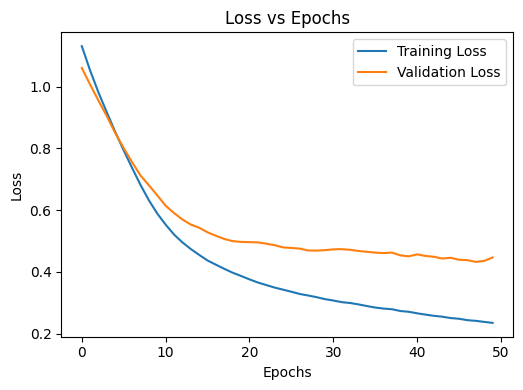

In [40]:
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.tight_layout()
plt.show()

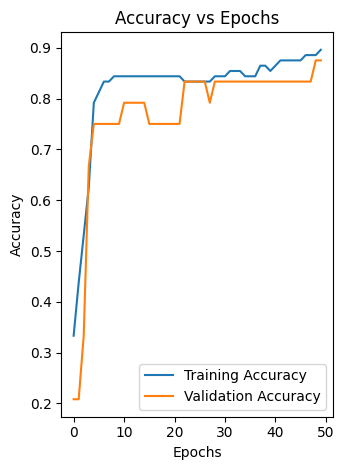

In [41]:
plt.subplot(1,2,2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.tight_layout()
plt.show()

# Save model and preprocessing tools

In [42]:
model.save('iris_ann_model.h5')
with open('iris_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('iris_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [43]:
# Evaluate model on test data (Score)
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 [==============================] - 0s 37ms/step - loss: 0.2287 - accuracy: 0.9667
Test Loss: 0.22869227826595306
Test Accuracy: 0.9666666388511658


# Take user input

In [44]:
print("Enter features to predict Iris flower type:")
sepal_length = float(input("Sepal length (cm): "))
sepal_width = float(input("Sepal width (cm): "))
petal_length = float(input("Petal length (cm): "))
petal_width = float(input("Petal width (cm): "))

user_input = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

Enter features to predict Iris flower type:


Sepal length (cm):  5.1
Sepal width (cm):  3.5
Petal length (cm):  1.4
Petal width (cm):  0.2


In [45]:
# Step 12: Preprocess user input
with open('iris_scaler.pkl', 'rb') as f:
    scaler_loaded = pickle.load(f)
with open('iris_encoder.pkl', 'rb') as f:
    encoder_loaded = pickle.load(f)

user_input_scaled = scaler_loaded.transform(user_input)

# Step 13: Load saved model
loaded_model = load_model('iris_ann_model.h5')

# Step 14: Predict using the model
prediction = loaded_model.predict(user_input_scaled)
predicted_class = np.argmax(prediction, axis=1)

# Step 15: Display output
flower_name = iris.target_names[predicted_class][0]
print(f"The predicted Iris flower type is: {flower_name}")

1/1 [==============================] - 0s 68ms/step
The predicted Iris flower type is: setosa
